In [2]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [3]:
# Importing Drag Build Ups

build_turbulent = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar.pkl")

In [4]:
path_1 = '../Results/2023-07-13_PolarResults_2022-06-13/'
path_2 = '../Results/2023-07-12_PolarResults_2022-06-15/'
path_3 = '../Results/2023-06-23_CREATeVShakedown/'
path_4 = '../Results/2023-07-06_CREATeVTuningAccelerations/'
path_5 = '../Results/2023-07-06_CREATeVCruising/'
path_6 = '../Results/2021-08-04_Cruise_Analysis/'

In [5]:
mass = 12.502 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

In [6]:
ct_cruise_binresult_june13 = pd.read_pickle(path_1+'ct_cruise_binresult.pkl')
eta_cruise_binresult_june13 = pd.read_pickle(path_1+'eta_cruise_binresult.pkl')
descent_binresult_june13 = pd.read_pickle(path_1+'descent_binresult.pkl')

ct_cruise_segresult_june13 = pd.read_pickle(path_1+'ct_cruise_segresult.pkl')
eta_cruise_segresult_june13 = pd.read_pickle(path_1+'eta_cruise_segresult.pkl')
descent_segresult_june13 = pd.read_pickle(path_1+'descent_segresult.pkl')

ct_cruise_binresult_june15 = pd.read_pickle(path_2+'ct_cruise_binresult.pkl')
eta_cruise_binresult_june15 = pd.read_pickle(path_2+'eta_cruise_binresult.pkl')
descent_binresult_june15 = pd.read_pickle(path_2+'descent_binresult.pkl')

ct_cruise_segresult_june15 = pd.read_pickle(path_2+'ct_cruise_segresult.pkl')
eta_cruise_segresult_june15 = pd.read_pickle(path_2+'eta_cruise_segresult.pkl')
descent_segresult_june15 = pd.read_pickle(path_2+'descent_segresult.pkl')

acceleration_binresult_2023 = pd.read_pickle(path_3+'acceleration_binresult.pkl')
acceleration_binresult_2023_fl2 = pd.read_pickle(path_4+'acceleration_binresult.pkl')

ct_cruise_binresult_2023 = pd.read_pickle(path_5+'ct_cruise_binresult.pkl')
eta_cruise_binresult_2023 = pd.read_pickle(path_5+'eta_cruise_binresult.pkl')

ct_cruise_segresult_2023 = pd.read_pickle(path_5+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2023 = pd.read_pickle(path_5+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2021 = pd.read_pickle(path_6+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2021 = pd.read_pickle(path_6+'eta_cruise_segresult.pkl')

ct_cruise_binresult_2021 = pd.read_pickle(path_6+'ct_cruise_binresult.pkl')
eta_cruise_binresult_2021 = pd.read_pickle(path_6+'eta_cruise_binresult.pkl')


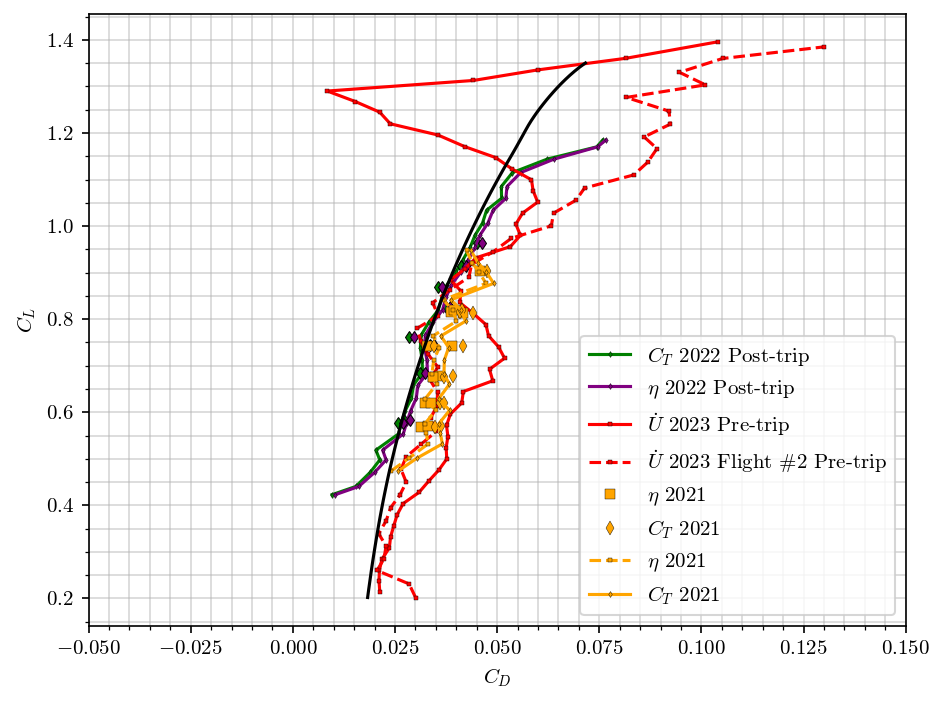

In [7]:
plt.figure(dpi=150)

# plt.plot(ct_cruise_binresult_june13.ave_polar.CD, ct_cruise_binresult_june13.ave_polar.CL, marker='s', markersize=2, color='green', linestyle='dashed', label="$C_T$ 2022 Pre-trip")
plt.plot(ct_cruise_binresult_june15.ave_polar.CD, ct_cruise_binresult_june15.ave_polar.CL, marker='d', markersize=2, color='green', linestyle='solid', label="$C_T$ 2022 Post-trip")
# plt.plot(ct_cruise_segresult_june13.ave_polar.CD, ct_cruise_segresult_june13.ave_polar.CL, marker='s', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='green')
plt.plot(ct_cruise_segresult_june15.ave_polar.CD, ct_cruise_segresult_june15.ave_polar.CL, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='green')

# plt.plot(eta_cruise_binresult_june13.ave_polar.CD, eta_cruise_binresult_june13.ave_polar.CL, marker='s', markersize=2, color='purple', linestyle='dashed', label="$\eta$ 2022 Pre-trip")
plt.plot(eta_cruise_binresult_june15.ave_polar.CD, eta_cruise_binresult_june15.ave_polar.CL, marker='d', markersize=2, color='purple', linestyle='solid', label="$\eta$ 2022 Post-trip")
# plt.plot(eta_cruise_segresult_june13.ave_polar.CD, eta_cruise_segresult_june13.ave_polar.CL, marker='s', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='purple')
plt.plot(eta_cruise_segresult_june15.ave_polar.CD, eta_cruise_segresult_june15.ave_polar.CL, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='purple')

# plt.plot(descent_binresult_june13.ave_polar.CD, descent_binresult_june13.ave_polar.CL, marker='s', markersize=2, color='orange', linestyle='dashed', label="$\dot{h}$ 2022 Pre-trip")
# plt.plot(descent_binresult_june15.ave_polar.CD, descent_binresult_june15.ave_polar.CL, marker='d', markersize=2, color='orange', linestyle='solid', label="$\dot{h}$ 2022 Post-trip")
# plt.plot(descent_segresult_june13.ave_polar.CD, descent_segresult_june13.ave_polar.CL, marker='s', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='orange')
# plt.plot(descent_segresult_june15.ave_polar.CD, descent_segresult_june15.ave_polar.CL, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='orange')

# plt.plot(acceleration_binresult_2023.raw_polar.CD, acceleration_binresult_2023.raw_polar.CL, linestyle='', marker='.', markersize=1, alpha=0.5)
plt.plot(acceleration_binresult_2023.ave_polar.CD, acceleration_binresult_2023.ave_polar.CL, marker='s', markersize=2, color='red', linestyle='solid', label="$\dot{U}$ 2023 Pre-trip")
plt.plot(acceleration_binresult_2023_fl2.ave_polar.CD, acceleration_binresult_2023_fl2.ave_polar.CL, marker='s', markersize=2, color='red', linestyle='dashed', label="$\dot{U}$ 2023 Flight #2 Pre-trip")

plt.plot(eta_cruise_segresult_2021.ave_polar.CD, eta_cruise_segresult_2021.ave_polar.CL, marker='s', markersize=5, color='orange', linestyle='', label="$\eta$ 2021")
plt.plot(ct_cruise_segresult_2021.ave_polar.CD, ct_cruise_segresult_2021.ave_polar.CL, marker='d', markersize=5, color='orange', linestyle='', label="$C_T$ 2021")

plt.plot(eta_cruise_binresult_2021.ave_polar.CD, eta_cruise_binresult_2021.ave_polar.CL, marker='s', markersize=2, color='orange', linestyle='dashed', label="$\eta$ 2021")
plt.plot(ct_cruise_binresult_2021.ave_polar.CD, ct_cruise_binresult_2021.ave_polar.CL, marker='d', markersize=2, color='orange', linestyle='solid', label="$C_T$ 2021")

plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black")

plt.legend()
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([-0.05, 0.15])
plt.show()

In [8]:
print(ct_cruise_binresult_june15.fit_polar)

[0.01630308 0.36075351 0.23286301]


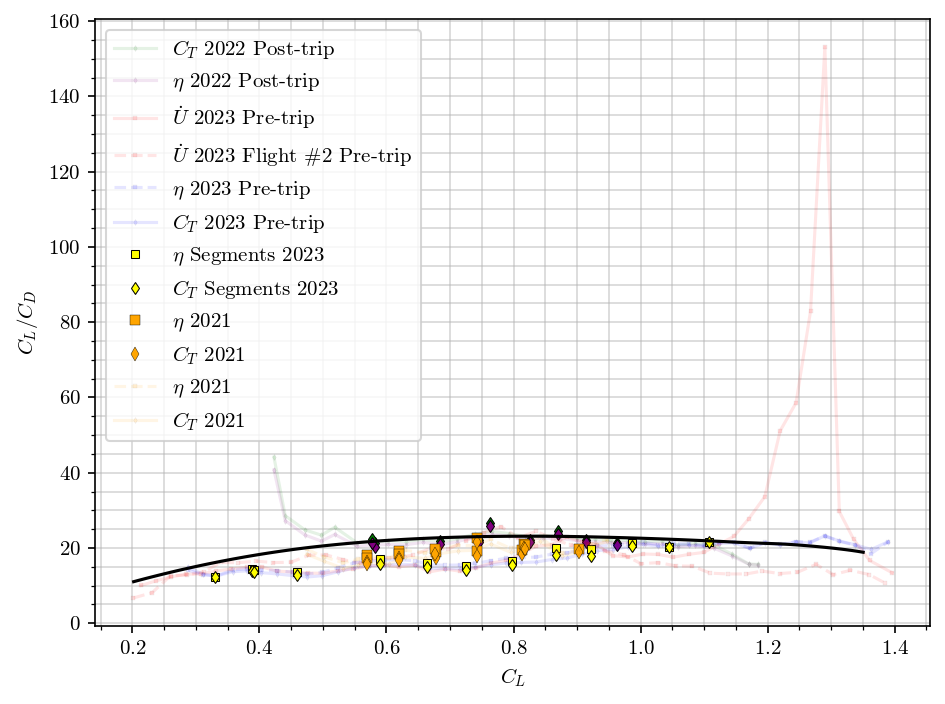

In [9]:
plt.figure(dpi=150)

plt.plot(ct_cruise_binresult_june15.ave_polar.CL, ct_cruise_binresult_june15.ave_polar.CL/ct_cruise_binresult_june15.ave_polar.CD, marker='d', markersize=2, color='green', linestyle='solid', alpha=0.1, label="$C_T$ 2022 Post-trip")
plt.plot(ct_cruise_segresult_june15.ave_polar.CL, ct_cruise_segresult_june15.ave_polar.CL/ct_cruise_segresult_june15.ave_polar.CD, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='green')

plt.plot(eta_cruise_binresult_june15.ave_polar.CL, eta_cruise_binresult_june15.ave_polar.CL/eta_cruise_binresult_june15.ave_polar.CD, marker='d', markersize=2, color='purple', linestyle='solid', alpha=0.1, label="$\eta$ 2022 Post-trip")
plt.plot(eta_cruise_segresult_june15.ave_polar.CL, eta_cruise_segresult_june15.ave_polar.CL/eta_cruise_segresult_june15.ave_polar.CD, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='purple')

plt.plot(acceleration_binresult_2023.ave_polar.CL, acceleration_binresult_2023.ave_polar.CL/acceleration_binresult_2023.ave_polar.CD, marker='s', markersize=2, color='red', linestyle='solid', alpha=0.1, label="$\dot{U}$ 2023 Pre-trip")
plt.plot(acceleration_binresult_2023_fl2.ave_polar.CL, acceleration_binresult_2023_fl2.ave_polar.CL/acceleration_binresult_2023_fl2.ave_polar.CD, marker='s', markersize=2, color='red', linestyle='dashed', alpha=0.1, label="$\dot{U}$ 2023 Flight #2 Pre-trip")

plt.plot(eta_cruise_binresult_2023.ave_polar.CL, eta_cruise_binresult_2023.ave_polar.CL/eta_cruise_binresult_2023.ave_polar.CD, marker='s', markersize=2, color='blue', linestyle='dashed', alpha=0.1, label="$\eta$ 2023 Pre-trip")
plt.plot(ct_cruise_binresult_2023.ave_polar.CL, ct_cruise_binresult_2023.ave_polar.CL/ct_cruise_binresult_2023.ave_polar.CD, marker='d', markersize=2, color='blue', linestyle='solid', alpha=0.1, label="$C_T$ 2023 Pre-trip")
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.ave_polar.CL/eta_cruise_segresult_2023.ave_polar.CD, marker='s', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='yellow', label="$\eta$ Segments 2023")
plt.plot(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.ave_polar.CL/ct_cruise_segresult_2023.ave_polar.CD, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='yellow', label="$C_T$ Segments 2023")

plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.ave_polar.CL/eta_cruise_segresult_2021.ave_polar.CD, marker='s', markersize=5, color='orange', linestyle='', label="$\eta$ 2021")
plt.plot(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.ave_polar.CL/ct_cruise_segresult_2021.ave_polar.CD, marker='d', markersize=5, color='orange', linestyle='', label="$C_T$ 2021")

plt.plot(eta_cruise_binresult_2021.ave_polar.CL, eta_cruise_binresult_2021.ave_polar.CL/eta_cruise_binresult_2021.ave_polar.CD, marker='s', markersize=2, color='orange', linestyle='dashed', alpha=0.1, label="$\eta$ 2021")
plt.plot(ct_cruise_binresult_2021.ave_polar.CL, ct_cruise_binresult_2021.ave_polar.CL/ct_cruise_binresult_2021.ave_polar.CD, marker='d', markersize=2, color='orange', linestyle='solid', alpha=0.1, label="$C_T$ 2021")

plt.plot(build_turbulent.CL, build_turbulent.CL/build_turbulent.CD, linestyle="solid", marker="", color="black")

plt.legend()
plt.xlabel("$C_L$")
plt.ylabel("$C_L / C_D$")
#plt.xlim([-0.05, 0.15])
plt.show()

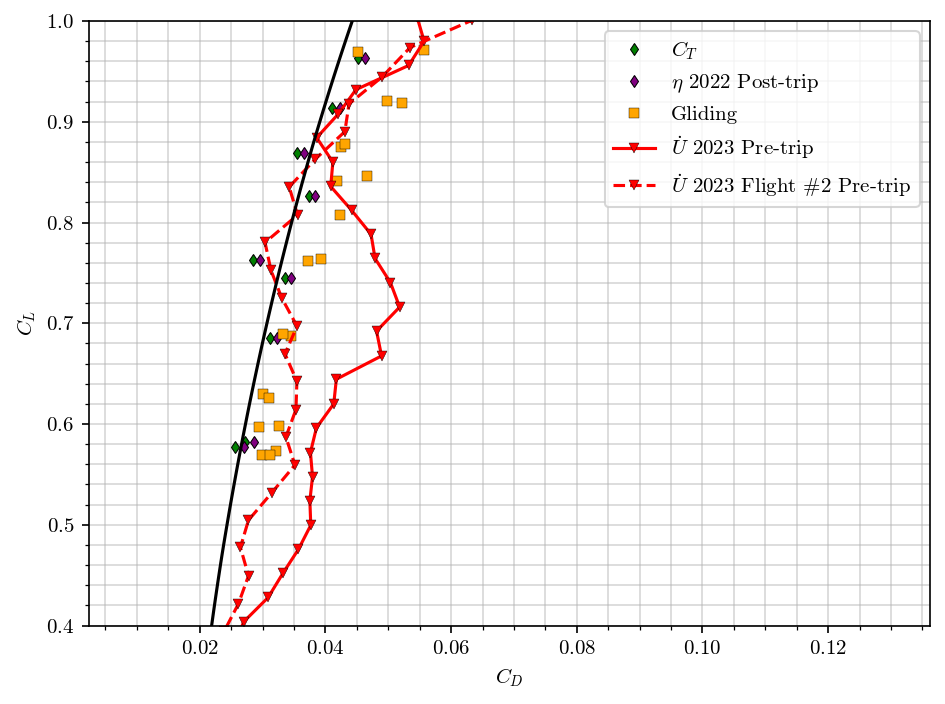

In [10]:
plt.figure(dpi=150)

plt.plot(ct_cruise_segresult_june15.ave_polar.CD, ct_cruise_segresult_june15.ave_polar.CL, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='green', label="$C_T$")
plt.plot(eta_cruise_segresult_june15.ave_polar.CD, eta_cruise_segresult_june15.ave_polar.CL, marker='d', markeredgecolor='black', markeredgewidth= 0.5, linestyle='', color='purple', label="$\eta$ 2022 Post-trip")

plt.plot(descent_segresult_june15.ave_polar.CD, descent_segresult_june15.ave_polar.CL, marker='s', markersize=5, color='orange', linestyle='', label="Gliding")

plt.plot(acceleration_binresult_2023.ave_polar.CD, acceleration_binresult_2023.ave_polar.CL, marker='v', markersize=5, color='red', linestyle='solid', label="$\dot{U}$ 2023 Pre-trip")
plt.plot(acceleration_binresult_2023_fl2.ave_polar.CD, acceleration_binresult_2023_fl2.ave_polar.CL, marker='v', markersize=5, color='red', linestyle='dashed', label="$\dot{U}$ 2023 Flight #2 Pre-trip")

plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black")
descent_segresult_june15
plt.legend()
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.ylim([0.4, 1.0])
plt.show()

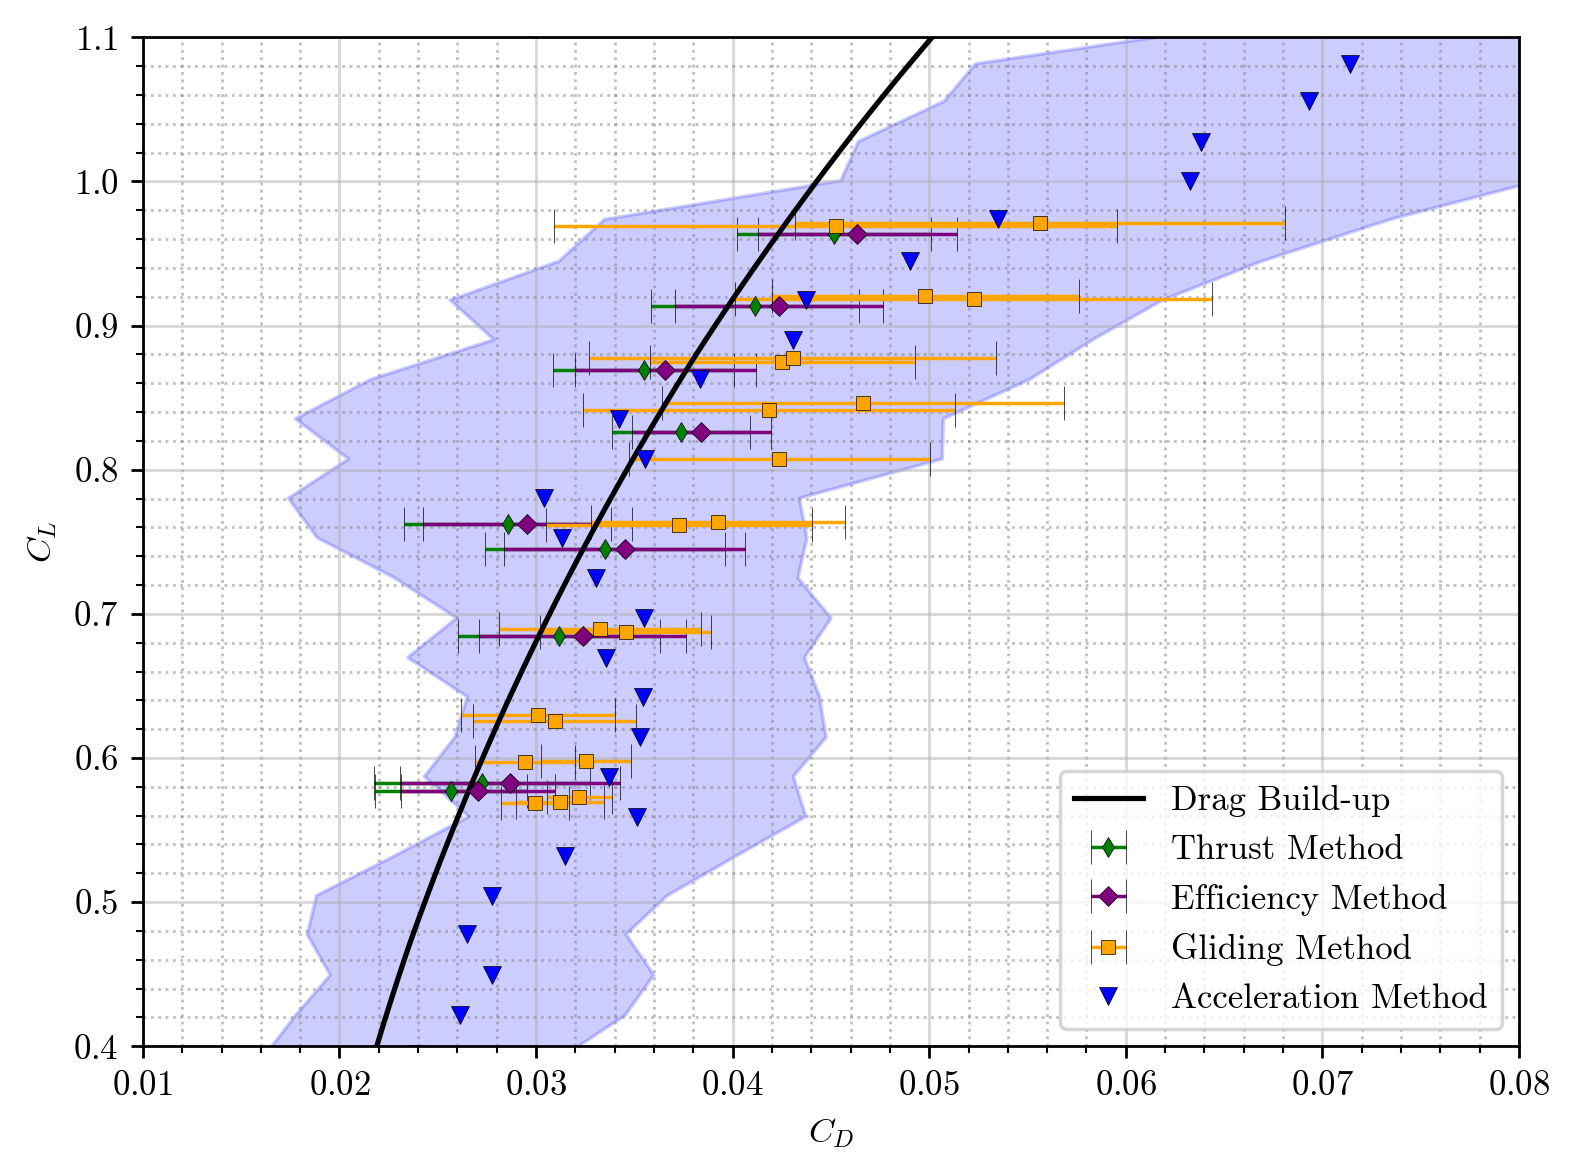

In [16]:
plt.figure(dpi=250)
plt.errorbar(ct_cruise_segresult_june15.ave_polar.CD, ct_cruise_segresult_june15.ave_polar.CL, xerr=ct_cruise_segresult_june15.std_polar.CD / 2, linestyle='', marker='d', color='green', elinewidth=1, capsize=5, label="Thrust Method")
plt.errorbar(eta_cruise_segresult_june15.ave_polar.CD, eta_cruise_segresult_june15.ave_polar.CL, xerr=eta_cruise_segresult_june15.std_polar.CD / 2, linestyle='', marker='D', color='purple', elinewidth=1, capsize=5, label="Efficiency Method")
plt.errorbar(descent_segresult_june15.ave_polar.CD, descent_segresult_june15.ave_polar.CL, xerr=descent_segresult_june15.std_polar.CD / 2, linestyle='', marker='s', color='orange', elinewidth=1, capsize=5, label="Gliding Method")
plt.errorbar(acceleration_binresult_2023_fl2.ave_polar.CD, acceleration_binresult_2023_fl2.ave_polar.CL, marker='v', linestyle='', markersize=5, color='blue', label="Acceleration Method")
plt.fill_betweenx(acceleration_binresult_2023_fl2.ave_polar.CL, acceleration_binresult_2023_fl2.ave_polar.CD - (acceleration_binresult_2023_fl2.std_polar.CD / 2), acceleration_binresult_2023_fl2.ave_polar.CD + (acceleration_binresult_2023_fl2.std_polar.CD / 2), color='blue', alpha=0.2)

plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label="Drag Build-up")
plt.legend(loc='lower right')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.ylim([0.4, 1.1])
plt.xlim([0.01, 0.08])

plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.tight_layout
plt.show()

In [12]:
def rem_ellipticalperf(CL, CD, airplane):
    CD_nell = CD - (CL**2 * (np.pi * airplane.AR)**-1)
    return CD_nell

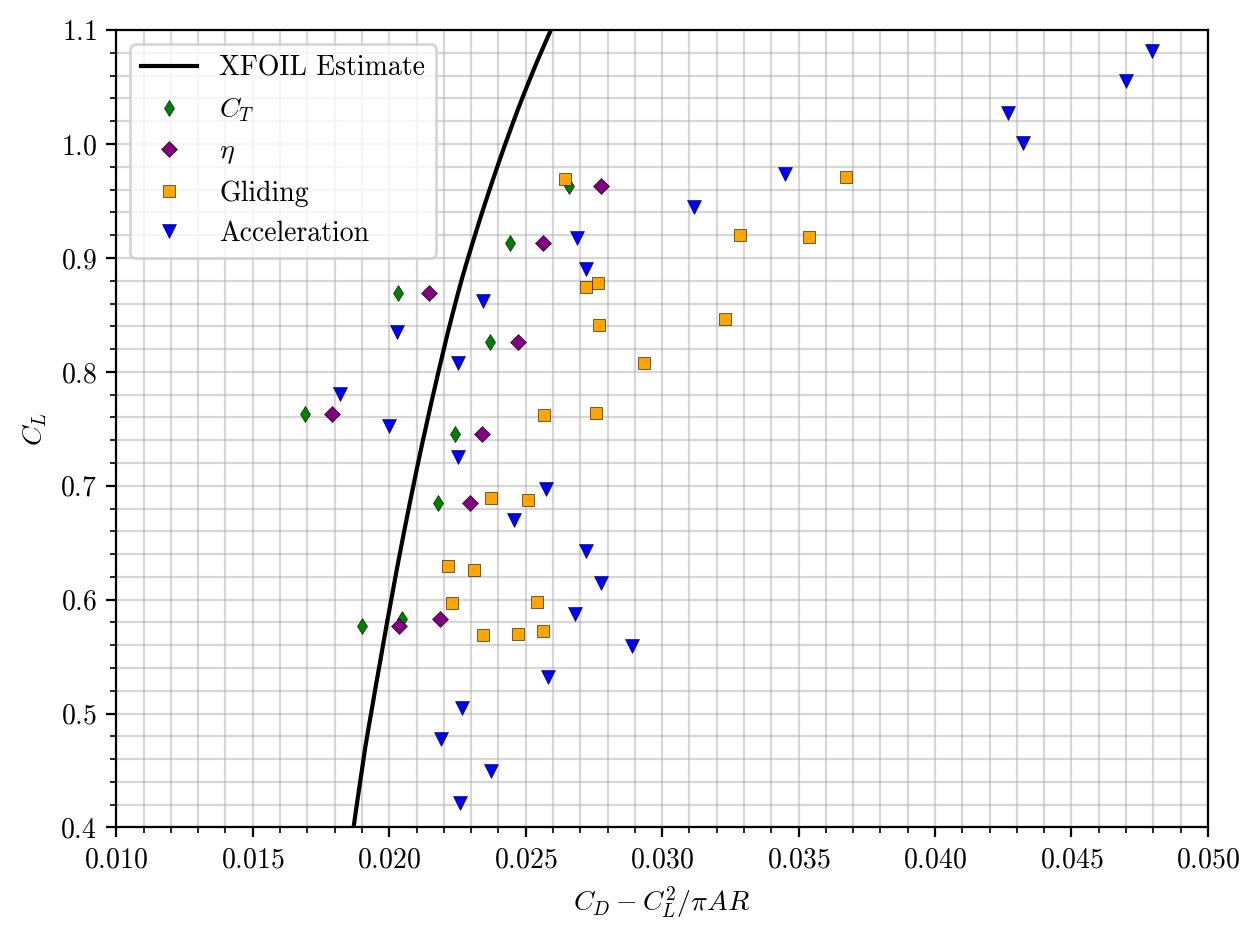

In [13]:
fig_dragpolarnell = plt.figure(dpi=200)
plt.plot(rem_ellipticalperf(build_turbulent.CL, build_turbulent.CD, createv), build_turbulent.CL, marker='', markeredgecolor=[0,0,0], markersize=3, markeredgewidth=0.1, linestyle='-', color='black', label='XFOIL Estimate')

plt.errorbar(rem_ellipticalperf(ct_cruise_segresult_june15.ave_polar.CL, ct_cruise_segresult_june15.ave_polar.CD, createv), ct_cruise_segresult_june15.ave_polar.CL, linestyle='', marker='d', color='green', elinewidth=1, capsize=5, label="$C_T$")
plt.errorbar(rem_ellipticalperf(eta_cruise_segresult_june15.ave_polar.CL, eta_cruise_segresult_june15.ave_polar.CD, createv), eta_cruise_segresult_june15.ave_polar.CL, linestyle='', marker='D', color='purple', elinewidth=1, capsize=5, label="$\eta$")
plt.errorbar(rem_ellipticalperf(descent_segresult_june15.ave_polar.CL, descent_segresult_june15.ave_polar.CD, createv), descent_segresult_june15.ave_polar.CL, linestyle='', marker='s', color='orange', elinewidth=1, capsize=5, label="Gliding")
plt.errorbar(rem_ellipticalperf(acceleration_binresult_2023_fl2.ave_polar.CL, acceleration_binresult_2023_fl2.ave_polar.CD, createv), acceleration_binresult_2023_fl2.ave_polar.CL, marker='v', linestyle='', markersize=5, color='blue', label="Acceleration")

plt.legend()
plt.xlabel("$C_D - C_L^2 / \pi AR$")
plt.ylabel("$C_L$")

plt.ylim([0.4, 1.1])
plt.xlim([0.01, 0.05])
plt.show()

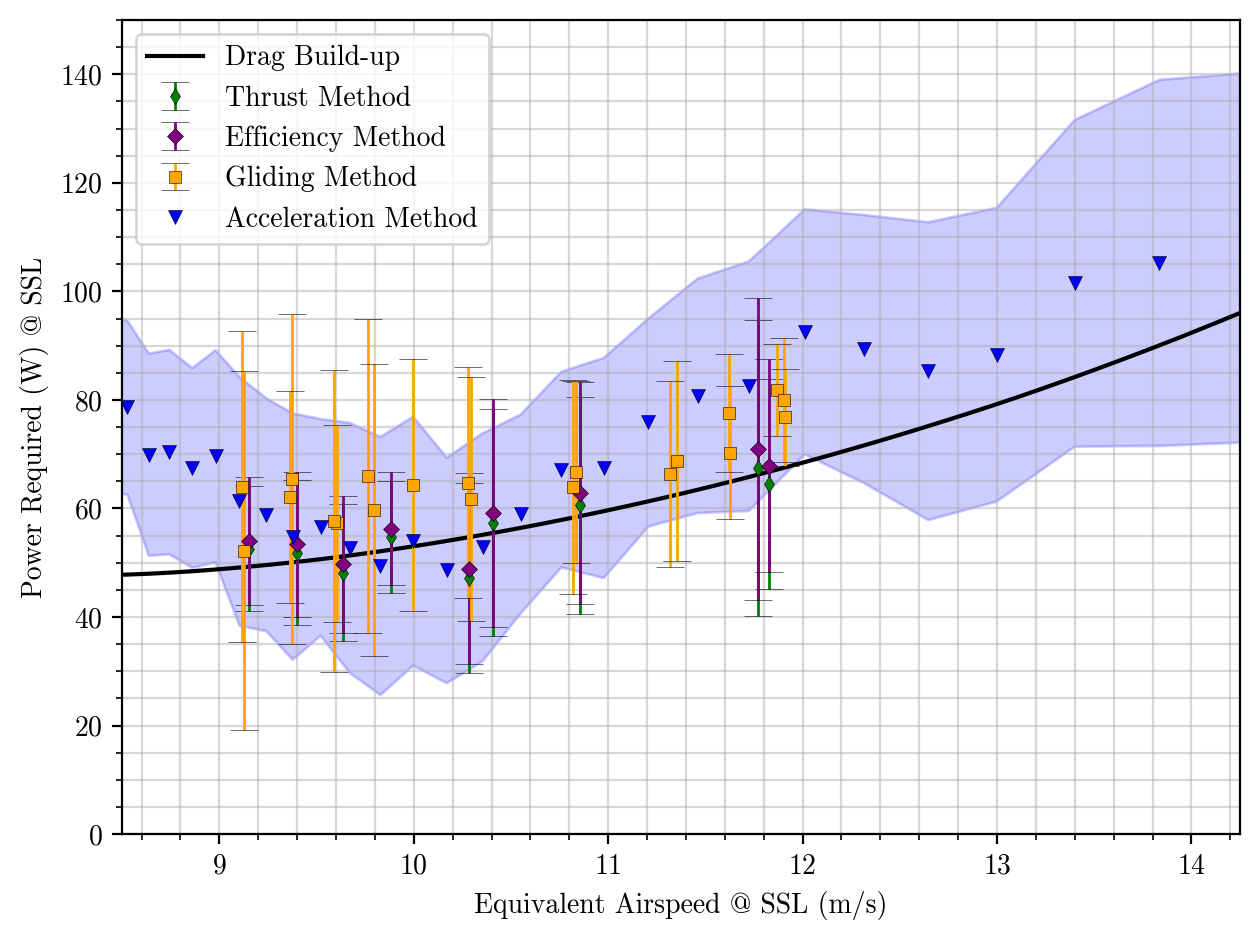

In [20]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_june15.ave_polar.CL , ct_cruise_segresult_june15.ave_polar.CD)
[Preq_eta, EAS_eta] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_june15.ave_polar.CL, eta_cruise_segresult_june15.ave_polar.CD)
[Preq_glide, EAS_glide] = cl_finders.rawpolar2preqew(createv, descent_segresult_june15.ave_polar.CL, descent_segresult_june15.ave_polar.CD)
[Preq_acc, EAS_acc] = cl_finders.rawpolar2preqew(createv, acceleration_binresult_2023_fl2.ave_polar.CL, acceleration_binresult_2023_fl2.ave_polar.CD)

[Preq_XFLR5, EAS_XFLR5] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)

# print(eta_cruise_segresult_june15.ave_polar.CD)
# print(eta_cruise_segresult_june15.ave_polar.CL)

# print(Preq_eta)
# print(EAS_eta)

fig_preq = plt.figure(dpi=200)

plt.plot(EAS_XFLR5, Preq_XFLR5, linestyle='solid', color='black', marker='', label='Drag Build-up')

plt.errorbar(EAS_ct, Preq_ct, yerr=ct_cruise_segresult_june15.std_polar.CD * (0.5 * 1.225 * EAS_ct**3 * createv.area), linestyle='', marker='d', color='green', elinewidth=1, capsize=5, label="Thrust Method")
plt.errorbar(EAS_eta, Preq_eta, yerr=eta_cruise_segresult_june15.std_polar.CD * (0.5 * 1.225 * EAS_eta**3 * createv.area), linestyle='', marker='D', color='purple', elinewidth=1, capsize=5, label="Efficiency Method")
plt.errorbar(EAS_glide, Preq_glide, yerr=descent_segresult_june15.std_polar.CD * (0.5 * 1.225 * EAS_glide**3 * createv.area), linestyle='', marker='s', color='orange', elinewidth=1, capsize=5, label="Gliding Method")
plt.errorbar(EAS_acc, Preq_acc, marker='v', linestyle='', markersize=5, color='blue', label="Acceleration Method")
plt.fill_between(EAS_acc, Preq_acc - ((acceleration_binresult_2023_fl2.std_polar.CD * (0.5 * 1.225 * EAS_acc**3 * createv.area)) / 2), Preq_acc + ((acceleration_binresult_2023_fl2.std_polar.CD * (0.5 * 1.225 * EAS_acc**3 * createv.area)) / 2), color='blue', alpha=0.2)

plt.xlim([8.5, 14.25])
plt.ylim([0, 150])
plt.legend(loc='upper left')
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.show()